In [1]:
#!/usr/bin/env python3
#import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import matplotlib

from wilson2 import draw_sampling, Wilson, trace_estimator

import sys
sys.path.append('/home/carlo/workspace/networkqit')
import networkqit as nq

In [2]:
def factorial(x):
    if x==0 or x==1:
        return 1
    else:
        return x*factorial(x-1)

In [18]:
import autograd
import autograd.numpy as np

from autograd import grad, value_and_grad, deriv
from autograd.numpy.linalg import eigh, matrix_power, slogdet
import networkx as nx
import autograd.scipy
import matplotlib.pyplot as plt
from functools import partial

#G = nx.erdos_renyi_graph(128, 0.2)
G = nx.path_graph(10)
A  = nx.to_numpy_matrix(G)
D = np.asarray(np.diagflat(A.sum(0)))
invD  = np.asarray(np.diagflat(1/A.sum(0)))
n = nx.number_of_nodes(G)
I = np.eye(n).astype(float)

L = nx.laplacian_matrix(G).toarray()
lambda_max = np.max(eigh(L)[0])

order = 5
beta_range = np.logspace(-3,3,100)

lambdai = eigh(L)[0]

def r(beta, order=10):
    return np.sum([( (-1.0)**k/factorial(k) + (-1.0)**(k+1)/k)*(beta**k)*np.trace(matrix_power(L,k)) for k in range(3,order)])

def Z(beta):
    return np.sum(np.exp(-beta*lambdai))
    #return np.trace(scipy.linalg.expm(-beta*L))

def logR(beta):
    #return np.sum(np.log(eigh(I + beta*L)[0]))
    #return np.trace(scipy.linalg.logm(np.eye(n) + beta*L))
    return slogdet( np.eye(n) + beta*L )[1]

def logChi(beta):
    q= 1.0 / beta
    #return np.sum(np.log(eigh(q*I + L)[0])) - n*np.log(q)
    # alternative definitions
    return autograd.numpy.linalg.slogdet(q * I + L)[1] - n * np.log(q)
    #return np.trace(scipy.linalg.logm(q * I + L)) - n * np.log(q)

def E(beta):
    lambdairho = np.exp(-beta*lambdai)
    return np.sum(lambdai*lambdairho/np.sum(lambdairho))
    #return np.trace(L@scipy.linalg.expm(-beta*L))/Z(beta)

rbeta = np.asarray([r(beta) for beta in beta_range])
Zbeta = np.asarray([Z(beta) for beta in beta_range])
logChibeta = np.asarray([logChi(beta) for beta in beta_range])
logZbeta = np.asarray([np.log(Z(beta)) for beta in beta_range])
Ebeta = np.asarray([E(beta) for beta in beta_range])

def dFdbeta(beta):
    q = 1/beta
    num = - n*(q**2)
    den = -np.sum(lambdai) + n*(1-q)
    return num/den

In [19]:
dZdBeta = grad(Z)
dLogChidBeta = grad(logChi)
dEbetadbeta = grad(E)

def s(beta):
    q=1/beta
    return np.sum(q/(q+lambdai))

def dFdbeta(beta):
    q = 1/beta
    num = - n*(q**2)
    den = -np.sum(lambdai) + n*(1-q)
    return num/den

def Ewilson(beta):
    return np.sum(lambdai/(1+beta*lambdai)-1/beta)/(n-logChi(beta)+r(beta))
    #q = 1/beta
    #return -q*s(beta)/(n-logChi(beta)+r(beta))

Ewilsonbeta = np.asarray([Ewilson(beta) for beta in beta_range])

(0, 10.1)

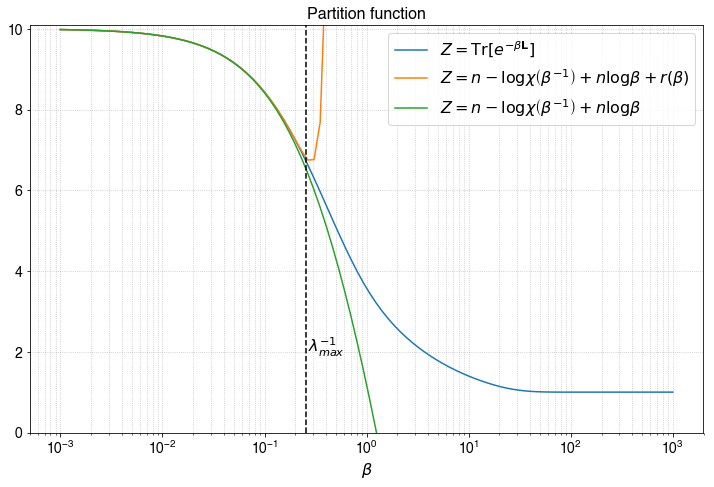

In [25]:
plt.figure(figsize=(7.5*1.61,7.5))
plt.semilogx(beta_range, Zbeta, label='$Z=\\mathrm{Tr}[e^{-\\beta \\mathbf{L}}]$')
plt.semilogx(beta_range, n-logChibeta + rbeta, label='$Z=n-\\log \\chi\\left(\\beta^{-1} \\right) + n\\log\\beta + r(\\beta)$')
plt.semilogx(beta_range, n-logChibeta , label='$Z=n-\\log \\chi\\left(\\beta^{-1} \\right) + n\\log\\beta $')
plt.grid(which='both',linestyle='dotted',alpha=0.8)
plt.axvline(x=1/lambdai.max(), ymin=0, ymax=n, color='black', linestyle='dashed')
plt.legend(fontsize=16,loc='best')
plt.title('Partition function', fontname='Helvetica',fontsize=16)
plt.text(x=1/lambdai.max()+0.01,y=2,s='$\\lambda_{max}^{-1}$',fontsize=16)
plt.xlabel('$\\beta$', fontsize=16, fontname='Helvetica')
plt.xticks(fontsize=14, fontname='Helvetica')
plt.yticks(fontsize=14, fontname='Helvetica')
plt.ylim([0,n*1.01])
#plt.savefig('z_vs_approx.png', dpi=200, bbox_inches='tight')

(-0.01, 2.3256109439239863)

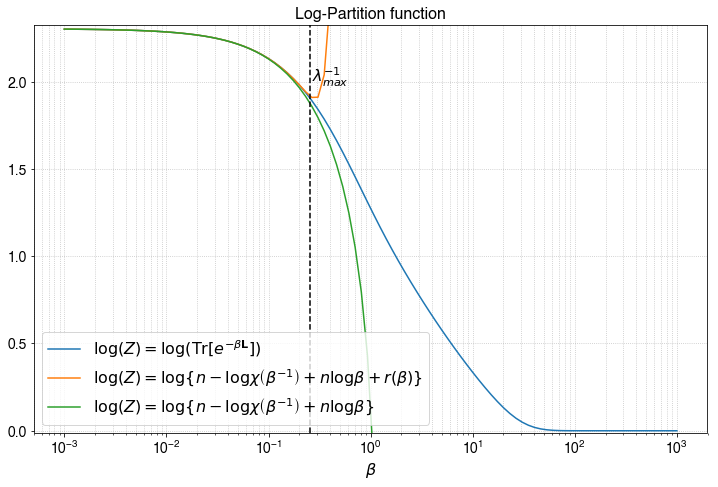

In [29]:
plt.figure(figsize=(7.5*1.61,7.5))
plt.semilogx(beta_range, np.log(Zbeta), label='$\\log(Z)=\\log(\\mathrm{Tr}[e^{-\\beta \\mathbf{L}}])$')
plt.semilogx(beta_range, np.log(n-logChibeta + rbeta), label='$\\log(Z)=\\log\\left \\{n-\\log \\chi\\left(\\beta^{-1} \\right) + n\\log\\beta + r(\\beta)\\right\\}$')
plt.semilogx(beta_range, np.log(n-logChibeta ), label='$\\log(Z)=\\log\\left \\{n-\\log \\chi\\left(\\beta^{-1} \\right) + n\\log\\beta \\right\\}$')
plt.grid(which='both', linestyle='dotted', alpha=0.8)
plt.axvline(x=1/lambdai.max(), ymin=0, ymax=n, color='black', linestyle='dashed')
plt.legend(fontsize=16, loc='upper-right')
plt.title('Log-Partition function', fontname='Helvetica', fontsize=16)
plt.text(x=1/lambdai.max()+0.01,y=2,s='$\\lambda_{max}^{-1}$', fontsize=16)
plt.xlabel('$\\beta$', fontsize=16, fontname='Helvetica')
plt.xticks(fontsize=14, fontname='Helvetica')
plt.yticks(fontsize=14, fontname='Helvetica')
plt.ylim([-0.01,np.log(n)*1.01])
#plt.xlim([1E-2,1E-1])
#plt.savefig('z_vs_approx.png', dpi=200, bbox_inches='tight')

In [30]:
import numdifftools as nd
dLogZdbeta = nd.Derivative(lambda x : -np.log(Z(x)) , n=1)
np.warnings.filterwarnings('ignore')
dLogZdbeta_beta = np.asarray([dLogZdbeta(beta) for beta in beta_range ])

dLogZdbetaApprox = nd.Derivative(lambda b : -np.log(n-logChi(b) ), n=1)
dLogZdbetaApprox_r = nd.Derivative(lambda b : -np.log(n-logChi(b) + r(b) ), n=1)

dLogZdbetaApprox_beta = np.asarray([dLogZdbetaApprox(beta) for beta in beta_range])
dLogZdbetaApprox_r_beta = np.asarray([dLogZdbetaApprox_r(beta) for beta in beta_range])

(-1, 1.9778442122428688)

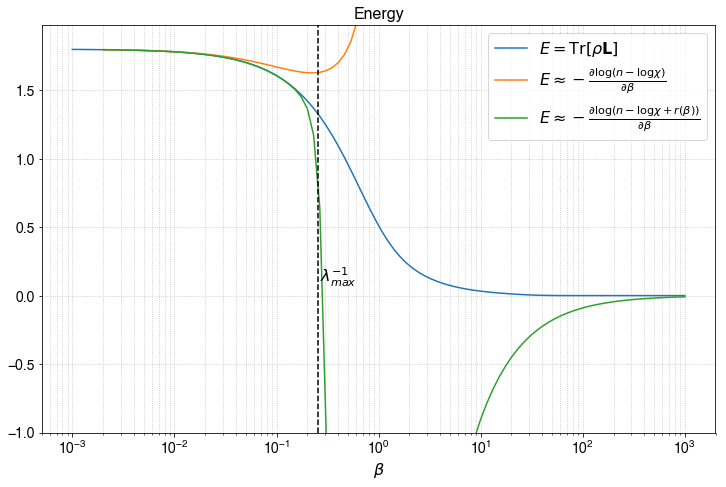

In [32]:
plt.figure(figsize=(7.5*1.61,7.5))
plt.semilogx(beta_range, Ebeta, label='$E=\\mathrm{Tr}[\\rho \\mathbf{L}]$')
#plt.semilogx(beta_range, dLogZdbeta_beta, label='$E=-\\frac{\\partial \\log Z}{\\partial \\beta}$', linestyle='dashed') # exactly the same as Tr[rho L]
plt.semilogx(beta_range, dLogZdbetaApprox_beta,   label='$E\\approx -\\frac{\\partial \\log(n-\\log \\chi )}{\\partial \\beta}$')
plt.semilogx(beta_range, dLogZdbetaApprox_r_beta, label='$E\\approx -\\frac{\\partial \\log(n-\\log \\chi + r(\\beta))}{\\partial \\beta}$')
plt.grid(which='both', linestyle='dotted', alpha=0.8)
plt.axvline(x=1/lambdai.max(), ymin=0, ymax=n, color='black', linestyle='dashed')
plt.legend(fontsize=16,loc='best')
plt.title('Energy', fontname='Helvetica',fontsize=16)
plt.text(x=1/lambdai.max() + 1E-2, y=0.1, s='$\\lambda_{max}^{-1}$',fontsize=16)
plt.xlabel('$\\beta$', fontsize=16, fontname='Helvetica')
plt.xticks(fontsize=14, fontname='Helvetica')
plt.yticks(fontsize=14, fontname='Helvetica')
#plt.xlim([1E-3,1E0])
plt.ylim([-1,Ebeta.max()*1.1])